<a href="https://colab.research.google.com/github/bijumanvya/Indix/blob/master/FE_Feature_IMportance_Correlation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Importance with Wine Quality

#Mount google drive
Mount drive with colab for file reading

In [13]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
filePath='/content/drive/MyDrive/BITS PILANI/winequality-red.csv'
wine=pd.read_csv(filePath,sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print(wine.shape)
print(wine.head())

(1599, 1)
  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                               
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                               
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                               
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                               


check if any null values to avoid sparsity

In [8]:
print(wine.isnull().sum())

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality    0
dtype: int64


#Correlation heat map to find out correlated features. Remove/reduce the correlated features as part of feature engineering.

#issues with correlated data

1.   Unstable Coefficient(Linear Models)Small changed in data- bnig swing in estimated coifficinet
2.   Interpretability breaks: Cannot consider all features are Important
3. Duplicate values create complexity in model
#Produce misleading feature important score




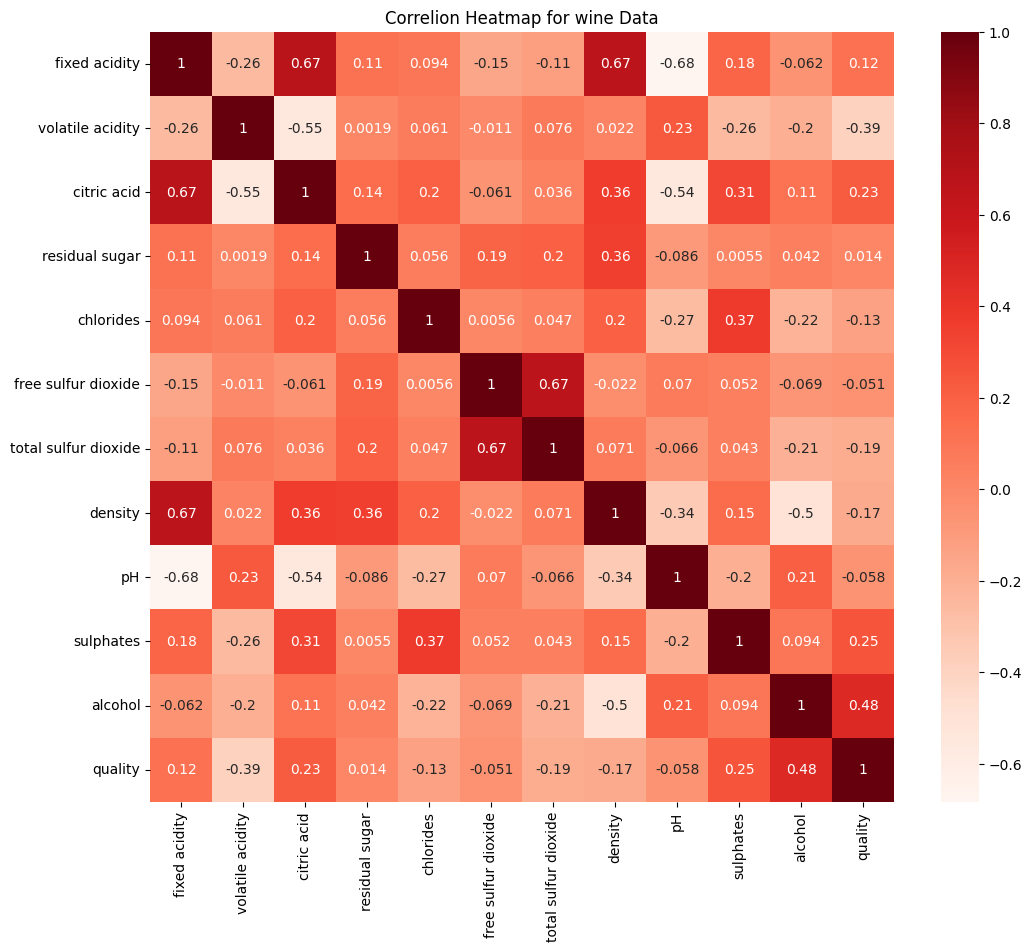

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
correlation=wine.corr()
sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds)
plt.title("Correlion Heatmap for wine Data")
plt.show()

#The map shows Quality of Wine is highly correlated with Citric Acide(-ve highg value correlation) and Alcohole(+ve high value correlation). So these features are important to predict Quality. At the same time, Features like
Fixed Acidity , Density, others which are correlated each other heavily, all/some of those features need to remove


#Important Features Vs Quality

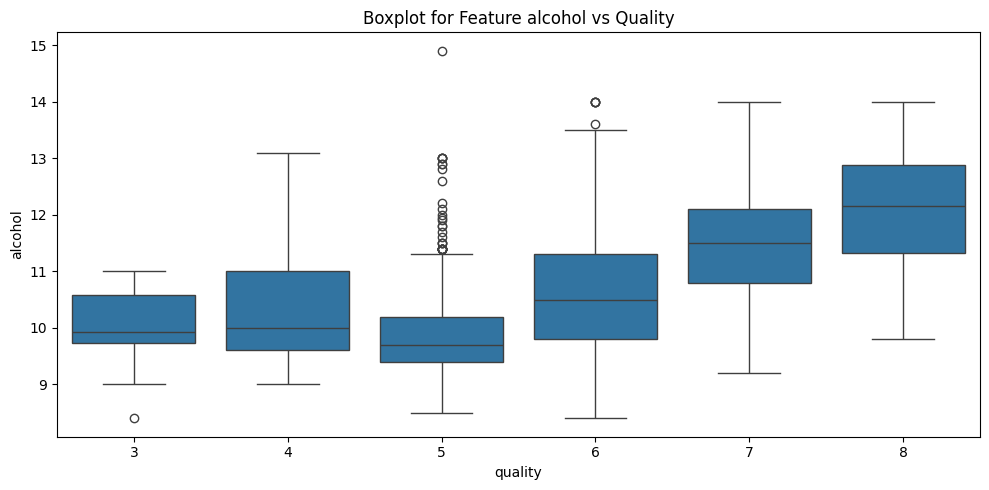

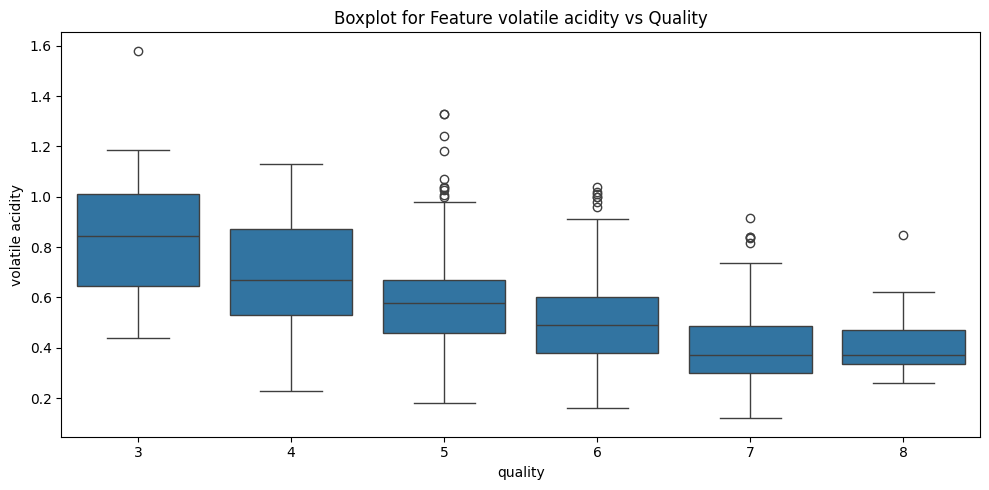

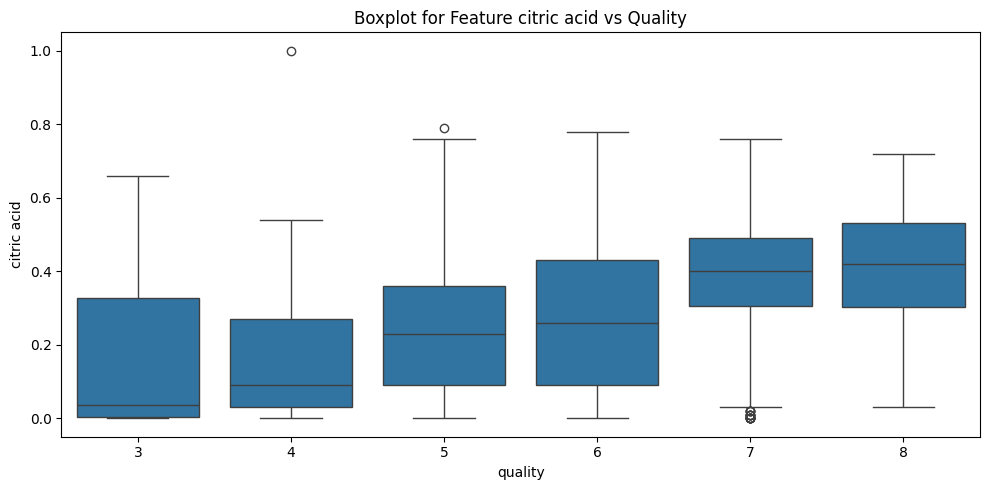

In [16]:
keyu_features=['alcohol','volatile acidity','citric acid']
for key in keyu_features:
  plt.figure(figsize=(10,5))
  sns.boxplot(x='quality',y=key,data=wine)
  plt.title(f"Boxplot for Feature {key} vs Quality")
  plt.tight_layout()
  plt.show()



#Feature Importance with Randomforest

                 Feature  Importance
0          fixed acidity    0.075106
1       volatile acidity    0.096902
2            citric acid    0.071624
3         residual sugar    0.071444
4              chlorides    0.080256
5    free sulfur dioxide    0.066778
6   total sulfur dioxide    0.102300
7                density    0.094191
8                     pH    0.076720
9              sulphates    0.115690
10               alcohol    0.148987


/tmp/ipython-input-2954779502.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=importance,palette='mako')


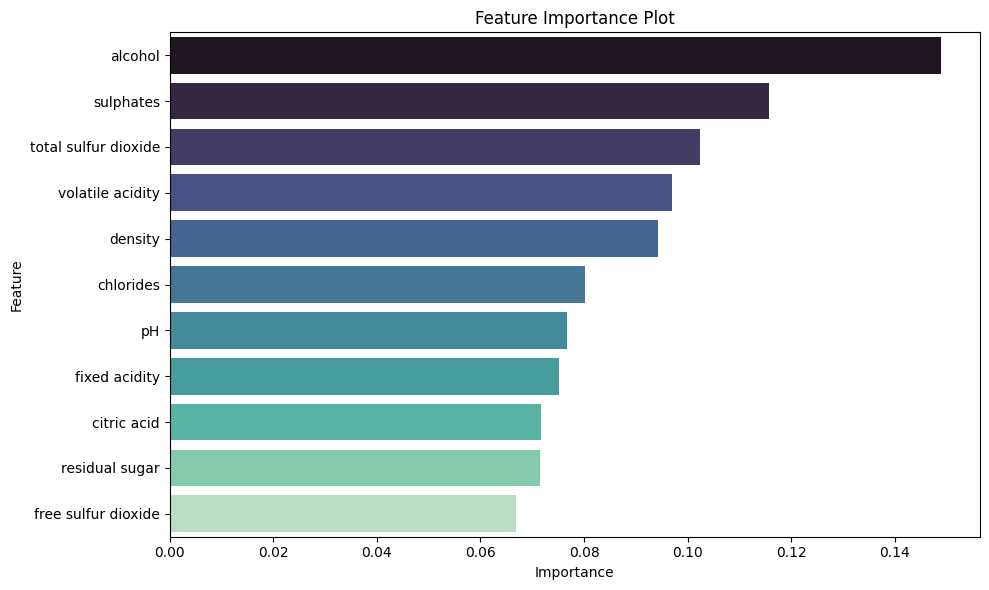

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#remove the outcome feature from row data
X=wine.drop('quality',axis=1)
y=wine['quality']

#split for train and test
X_transform=X.copy()
X_train,X_test,y_train,y_test=train_test_split(X_transform,y,test_size=0.2,random_state=42)

#train the model
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

#Feature important
importance=rf.feature_importances_

#create a dataframe with feature importance for plotting
feature_names=X.columns
importance=pd.DataFrame({'Feature':feature_names,'Importance':importance})
print(importance)
importance=importance.sort_values(by='Importance',ascending=False)

#plot the importance graph
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance,palette='mako')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Feature Importance Plot")
plt.tight_layout()
plt.show()